In [47]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D,Dropout,Input,Activation,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique
from keras.layers import Dense, GRU, MaxPool1D, Flatten, Dropout # importing dense layer
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer




import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [48]:
dataset = pd.read_csv('../input/rainfall-prediction/dataset1.csv')

In [49]:
dataset

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [50]:
 dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [51]:
# remove attribute 'day'
dataset.drop(['day'],axis=1,inplace=True)
dataset.shape

(366, 11)

In [52]:
##dataset.label.value_counts()


In [53]:
dataset = pd.get_dummies(dataset,columns=['rainfall'],prefix="",prefix_sep="")  
dataset


,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,no,yes
0,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80.0,26.3,0,1
1,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50.0,15.3,0,1
2,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40.0,14.2,0,1
3,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50.0,16.9,0,1
4,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40.0,13.7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,0.0,30.0,18.4,0,1
362,1026.6,18.6,17.3,16.3,12.8,75,85,1.0,20.0,25.9,0,1
363,1025.9,18.9,17.7,16.4,13.3,75,78,4.6,70.0,33.4,0,1
364,1025.3,19.2,17.3,15.2,13.3,78,86,1.2,20.0,20.9,0,1


In [54]:
y_train_multi= dataset[['yes','no']]
X_train_multi= dataset.drop(labels=['yes','no'], axis=1)

print('X_train has shape:',X_train_multi.shape,'\ny_train has shape:',y_train_multi.shape)

X_train has shape: (366, 10) 
y_train has shape: (366, 2)


In [55]:
from sklearn.preprocessing import LabelBinarizer

y_train_multi = LabelBinarizer().fit_transform(y_train_multi)
y_train_multi 

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1,

In [56]:
X_train_multi=np.array(X_train_multi)
y_train_multi=np.array(y_train_multi)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_train_multi,y_train_multi, test_size=0.20, random_state=42)

In [59]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(292, 10, 1)

In [60]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(74, 10, 1)

In [61]:
 dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pressure                366 non-null    float64
 1   maxtemp                 366 non-null    float64
 2   temparature             366 non-null    float64
 3   mintemp                 366 non-null    float64
 4   dewpoint                366 non-null    float64
 5   humidity                366 non-null    int64  
 6   cloud                   366 non-null    int64  
 7   sunshine                366 non-null    float64
 8            winddirection  365 non-null    float64
 9   windspeed               365 non-null    float64
 10  no                      366 non-null    uint8  
 11  yes                     366 non-null    uint8  
dtypes: float64(8), int64(2), uint8(2)
memory usage: 29.4 KB


In [63]:
    model = Sequential()
    model.add(SimpleRNN(32, input_shape= (X_train.shape[1], 1), activation='relu'))
    model.add(Dense(units= 10,activation='softmax' ))
    model.add(Dense(units= 2,activation='softmax' ))
        

In [64]:
# defining loss function, optimizer, metrics and then compiling model
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [65]:
# summary of model layers
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 32)                1088      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 22        
Total params: 1,440
Trainable params: 1,440
Non-trainable params: 0
_________________________________________________________________


In [66]:
# training the model on training dataset
history = model.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.7250 - accuracy: 0.4721 - val_loss: nan - val_accuracy: 0.5593
Epoch 2/100
1/1 [==============================] - 0s 60ms/step - loss: 0.7208 - accuracy: 0.4850 - val_loss: nan - val_accuracy: 0.5763
Epoch 3/100
1/1 [==============================] - 0s 57ms/step - loss: 0.7170 - accuracy: 0.5021 - val_loss: nan - val_accuracy: 0.5593
Epoch 4/100
1/1 [==============================] - 0s 64ms/step - loss: 0.7133 - accuracy: 0.5236 - val_loss: nan - val_accuracy: 0.5763
Epoch 5/100
1/1 [==============================] - 0s 56ms/step - loss: 0.7100 - accuracy: 0.5150 - val_loss: nan - val_accuracy: 0.6102
Epoch 6/100
1/1 [==============================] - 0s 59ms/step - loss: 0.7069 - accuracy: 0.5279 - val_loss: nan - val_accuracy: 0.6271
Epoch 7/100
1/1 [==============================] - 0s 50ms/step - loss: 0.7041 - accuracy: 0.5322 - val_loss: nan - val_accuracy: 0.6102
Epoch 8/100
1/1 [==========================

In [67]:
# predicting target attribute on testing dataset
score =model.evaluate(X_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
  

3/3 [==============================] - 0s 4ms/step - loss: 0.6052 - accuracy: 0.7568
Test loss: 0.6051958203315735
Test accuracy: 0.7567567825317383


Text(0, 0.5, 'Loss')

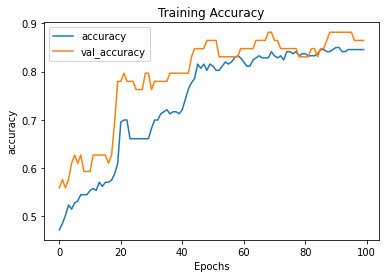

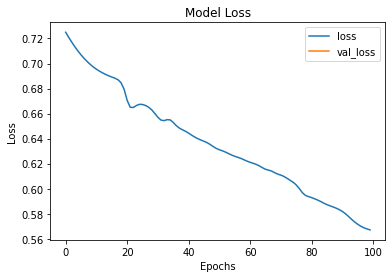

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)

pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")

pd.DataFrame(history.history)[["loss", "val_loss"]].plot()
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")